In [1]:
def remove_transparency(im, bg_colour=(255, 255, 255)):
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):
        alpha = im.convert('RGBA').split()[-1]
        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg
    else:
        return im

In [ ]:
# Png Resize
import os
import glob
from PIL import Image

path = "output_png"
output_path = "output_png_rm_alpha/"

files = os.listdir(path)
files_file = [f for f in files if os.path.isfile(os.path.join(path, f))]
for fname in files_file:
    bname, ext =  os.path.splitext(fname)
    if ext != ".png":
        continue
    img = Image.open("./" + path + "/" + bname + ext)
    img_bg = remove_transparency(img)
    img_bg.save("./" + output_path + bname + ext)


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import cv2
import os

(1280, 1280, 3)


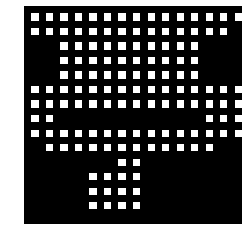

In [7]:
path = './output_png_rm_alpha/20141.png'
img = cv2.imread(path)
print(img.shape)
size = (30, 30)
img = cv2.resize(img, size)

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(2, 2), 
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
hog_image_rescaled.flatten()

plt.axis('off')
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# plt.savefig('hog.png')

In [9]:
result = []
output_path = "output_png_rm_alpha/"

files = os.listdir(output_path)
files_file = [f for f in files if os.path.isfile(os.path.join(output_path, f))]
for fname in files_file:
    bname, ext =  os.path.splitext(fname)
    if ext != ".png":
        continue
    path = './' +  output_path + fname
    img = cv2.imread(path)
    size = (30, 30)
    img = cv2.resize(img, size)

    try:
        fd, hog_image = hog(img, orientations=8, pixels_per_cell=(2, 2), 
                            cells_per_block=(1, 1), visualize=True, multichannel=True)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        flat = hog_image_rescaled.flatten()
        result.append(flat)
    except:
        print(path)
    
np.save('hog.npy', result)

In [10]:
from sklearn.cluster import KMeans
import pickle


hog = np.load('hog.npy')
model = KMeans(n_clusters=1000).fit(hog)
pickle.dump(model, open("kmeans.sav", 'wb'))

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


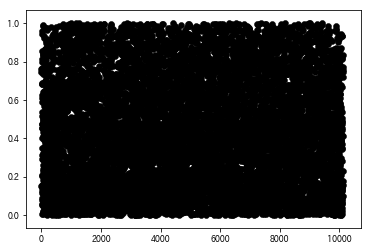

In [11]:
from sklearn import preprocessing


label_min_max = preprocessing.minmax_scale(model.labels_)

plt.figure()
for i in range(hog.shape[0] - 1):
    plt.scatter(i, label_min_max[i], c="black", linewidths="0.5")

plt.show()

In [12]:
import os


output_path = "output_png"
files = os.listdir(output_path)
files_file = [f for f in files if os.path.isfile(os.path.join(path, f))]
list = {}
idx = 0;
for fname in files_file:
    bname, ext =  os.path.splitext(fname)
    for c in cmap:
        if str(c) == bname:
            list[c] = model.labels_[idx]
            break
    idx = idx + 1

In [ ]:
str(list)

'{}'